In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *
from speechsep.base import *
from speechsep.utils import *

In [ ]:
files = get_audio_files("../data/esc50_sample/")

In [ ]:
len(files)

80

In [ ]:
audios = [AudioMono.create(fn) for fn in files[:1]]

In [ ]:
sample = audios[0]

In [ ]:
def has_inf(arr):
    np.isinf(np.sum(arr))

/home/holydemon/dev/Speech-Separation/nbdev/speechsep/core.py:93: RuntimeWarning: divide by zero encountered in log10
  new_data = np.log10(spec.data)


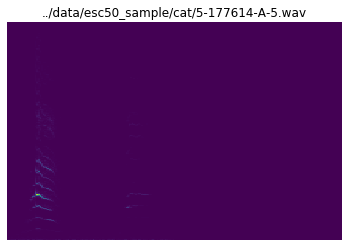

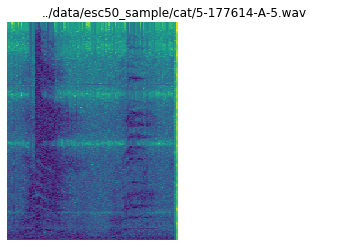

In [ ]:
#for a in audios[:10]:
for a in audios[:1]:
    spec = Spectify()(a)
    spec.show(title = a.fn)
    dspec = Decibelify()(spec)
    dspec.data = dspec.data
    dspec.show(title = a.fn)

In [ ]:
#export
class Decibelify2(Transform):
    def encodes(self,spec:SpecBase):
        np.seterr(divide='ignore'); new_data = np.log10(spec.data); np.seterr(divide='warn')
        noise = randomComplex(spec.data.shape)*0.0001
        filtr = np.isinf(new_data)
        new_data = np.where(filtr, 0, new_data)+noise
        return type(spec)(new_data, spec.sr, spec.fn)
        
    def decodes(self,spec:SpecBase):
        new_data = np.power(10, spec.data)
        return type(spec)(new_data, spec.sr, spec.fn)

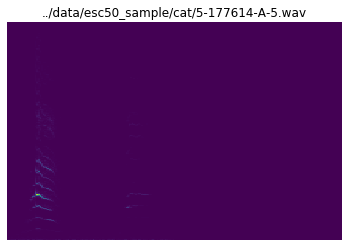

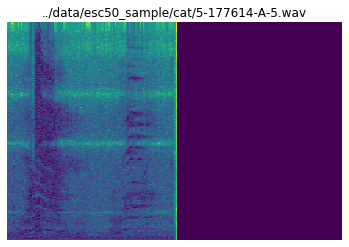

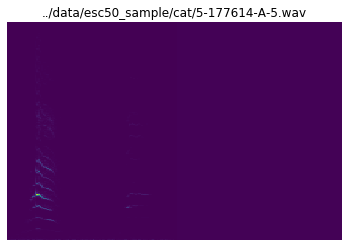

In [ ]:
#for a in audios[:10]:
for a in audios[:1]:
    spec = Spectify()(a)
    spec.show(title = a.fn)
    dspec = Decibelify2()(spec)
    dspec.show(title = a.fn)
    respec = Decibelify2().decode(dspec)
    respec.show(title = a.fn)
    reaudio = Spectify().decode(respec)
    reaudio.listen()